<a href="https://colab.research.google.com/github/DinaMuktubayeva/Deep-Learning/blob/main/Dogs_and_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing data

Loading the Cats and Dogs dataset

In [ ]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

--2020-11-23 07:20:09--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.93.0.142, 2600:1417:76:587::e59, 2600:1417:76:58e::e59, ...
Connecting to download.microsoft.com (download.microsoft.com)|104.93.0.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  9.97MB/s    in 88s     

2020-11-23 07:21:37 (8.93 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



Here we use the *os* library to access the file system to unzip the folder containging the dataset.

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats-and-dogs.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

We have 12501 images of cats and 12501 images of dogs

In [ ]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


Instead of storing the data in arrays, we will use ImageGenerator to label the images according to their subdirectories. Therefore, we need to define variables to store the paths to these subdirectories.

In [ ]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

The /tmp/cats-and-dogs directory has been created. It contains the *train* and the *validation* folders, each of which consists of the *cats* and *dogs* folders

Let's define some variables for the dataset

In [ ]:
TRAINING_DIR = '/tmp/cats-v-dogs/training/'
TESTING_DIR = '/tmp/cats-v-dogs/testing/'

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = TRAINING_DIR + "cats/"
TESTING_CATS_DIR = TESTING_DIR + "cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = TRAINING_DIR + "dogs/"
TESTING_DOGS_DIR = TESTING_DIR + "dogs/"

TRAINING_CATS_FNAMES = os.listdir(TRAINING_CATS_DIR)
TRAINING_DOGS_FNAMES = os.listdir(TRAINING_DOGS_DIR)
CAT_IMG_FILES = [os.path.join(TRAINING_CATS_DIR, f) for f in TRAINING_CATS_FNAMES]
DOG_IMG_FILES = [os.path.join(TRAINING_DOGS_DIR, f) for f in TRAINING_DOGS_FNAMES]

Now we need to add image files to these newly created folders. We will randomly split the entire dataset from PetImages into the training and testing datasets by copying the inage files into the corresonding directories.

We must exclude the empty files from our working datasets.

In [ ]:
import random
from shutil import copyfile

# function to split the dataset into training ans testing data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  file_names=[]
  file_names_non_empty=[]
  file_names = os.listdir(SOURCE)

  for files in file_names:
    if not os.path.getsize(SOURCE + files) == 0:
      file_names_non_empty.append(files)
    else:
      print("Zero Size file:", files)

  random_file_names = random.sample(file_names_non_empty, len(file_names_non_empty))
  split1 = random_file_names[:int(0.9*len(random_file_names))]
  split2 = random_file_names[int(0.9*len(random_file_names)):]   
                             
  for files in split1:
      copyfile(SOURCE + files, TRAINING + files)
  for files in split2:
      copyfile(SOURCE + files, TESTING + files)

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

Zero Size file: 666.jpg
Zero Size file: 11702.jpg


We should have 11250 training cat images and 1250 validation cat images. The same numbers are for the dog images.

In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


Let's have a look at some images

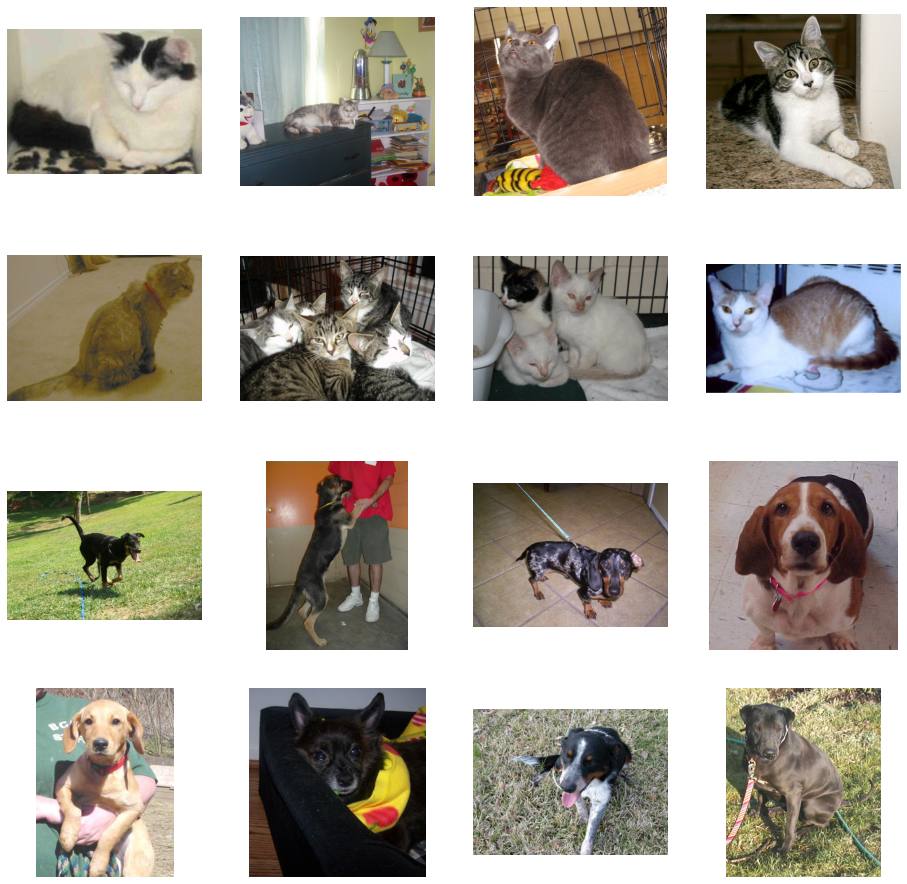

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# We'll make a 4x4 grid
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index = 8

next_cat_pix = [os.path.join(TRAINING_CATS_DIR, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(TRAINING_DOGS_DIR, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Building a Model

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
                                    
    # The input shape is 150x150 with 3 bytes for color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 

    # 1 output neuron with 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

Optimizers like Adam, Adagrad, and RMSprop automate learning-rate tuning.

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

## Data Preprocessing

Using ImageDataGenerator in keras, we can load the data into batches containing the images and their labels

We should have 22498 images for training images and 2500 images for testing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalizing image sizes
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# Flow of training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

# Flow of testing images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(TESTING_DIR,
                                                         batch_size=10,
                                                         class_mode='binary',
                                                         target_size = (150, 150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


## Training

In [ ]:
import warnings
warnings.filterwarnings("ignore")

history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/5
2250/2250 [==============================] - 77s 34ms/step - loss: 0.4073 - accuracy: 0.8634 - val_loss: 0.6068 - val_accuracy: 0.7540
Epoch 2/5
2250/2250 [==============================] - 75s 33ms/step - loss: 0.4244 - accuracy: 0.8549 - val_loss: 0.6020 - val_accuracy: 0.8060
Epoch 3/5
2250/2250 [==============================] - 75s 33ms/step - loss: 0.4374 - accuracy: 0.8537 - val_loss: 0.5708 - val_accuracy: 0.7536
Epoch 4/5
2250/2250 [==============================] - 74s 33ms/step - loss: 0.4661 - accuracy: 0.8492 - val_loss: 0.5061 - val_accuracy: 0.8116
Epoch 5/5
2250/2250 [==============================] - 73s 33ms/step - loss: 0.4538 - accuracy: 0.8498 - val_loss: 0.4407 - val_accuracy: 0.8084


# Evaluating the Accuraccy and Loss

Text(0.5, 1.0, 'Training and validation loss')

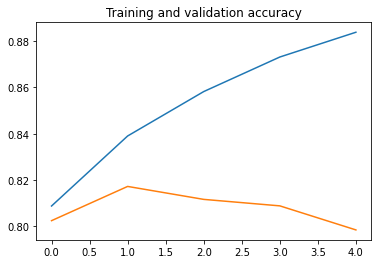

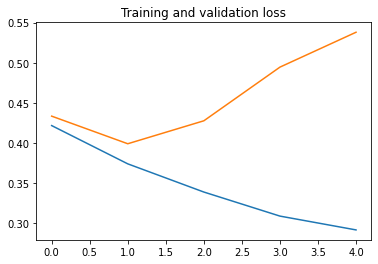

In [ ]:
# Results after each epoch
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) #number of epochs

# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')

# Running the model for a chosen image

This code allows to upload images from one's local filesystem and let the model decide whether there're cats or dogs

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  # letting the model analyze the images
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")    
  else:
    print(fn + " is a cat") 

Saving cat-323262_1920.jpg to cat-323262_1920 (1).jpg
[1.]
cat-323262_1920.jpg is a dog


# Visualising Intermediate Representations

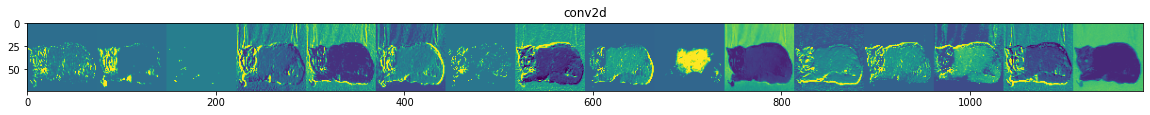

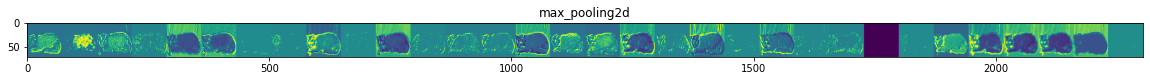

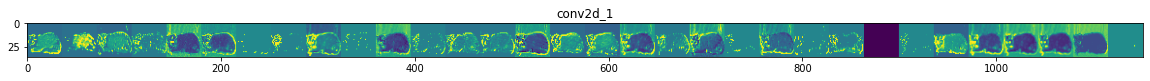

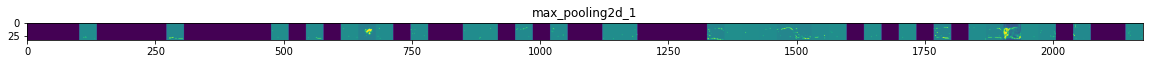

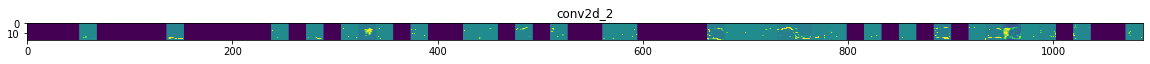

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))

x   = img_to_array(img)           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Running the image throught the model
successive_feature_maps = visualization_model.predict(x)

# Layer names for the plot
layer_names = [layer.name for layer in model.layers]

# Displaying the representation for the convolution and pooling
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the features
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    # Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

# Clean Up

In [ ]:
!rm -rf /tmp/cats-v-dogs